## Bank speeches starter template

The [Kaggle data set](https://www.kaggle.com/datasets/davidgauthier/central-bank-speeches/data) used in this project use speeches from senior central bankers of various influential central banks. The corpus runs from 1997 until 2022. Central banks are institutions that define monetary policy. As such, central bank speeches are widely followed and have a major influence on financial markets.

You can also refer to the raw data set and article used [here](https://www.kaggle.com/datasets/magnushansson/central-bank-speeches).

Note that, due to the large number of speeches contained in the data set, you can expect long running times for processing intensive steps such as sentiment analysis when using the full data set (30-60 mins). It is recommended that you reduce the subset of data under review when creating your prototype and then run the full data set through, if required, once the code behaves as expected. You can reduce the data set to, for example, only process data from the United Kingdom (or other countries) or by looking at specific date ranges.

The code is not extensive and you will be expected to use the provided code as a starting point only. You will also need to use your own creativity and logic to identify useful patterns in the data. You can explore sentiment, polarity and entities/keywords, and should use appropriate levels of granularity and aggregation in order to analyse patterns contained in the data.

In [2]:
# Install the necessary libraries.
#!pip install nltk
#!pip install vaderSentiment
#!pip install textblob

In [91]:
# Import relevant libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elif\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\elif\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\elif\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [93]:
# The function to determine whether there are missing values. 
def check_missing_values(df):
    if df.isnull().values.any():
        print("There are missing values in the DataFrame.")
    else:
        print("No missing values in the DataFrame.")

In [95]:
# Load dataset. Change directory as required.
#Elif's file path
#df_all_speeches = pd.read_csv('C:\\Users\\elif.ozkol\\Desktop\\LSE Project\\all_speeches.csv')
df_all_speeches = pd.read_csv('C:\\Users\\elif\\Desktop\\LSE BoE project\\all_speeches.csv')
#Gamze's file path
#df_all_speeches = pd.read_csv("C:\\Users\\gamze bozkurt omar\\Desktop\\Employer_Project\\Central_Bank_Speeches-2\\all_speeches.csv")



In [96]:
df_all_speeches.head()

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


In [97]:
# Check for missing values

check_missing_values(df_all_speeches)

No missing values in the DataFrame.


In [98]:
# Dropping duplicates

df_all_speeches = df_all_speeches.drop_duplicates()

df_all_speeches

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...
7716,r221010a_FOMC,united states,2022-10-10,Restoring Price Stability in an Uncertain Econ...,brainard,0,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,united states,2022-10-12,Managing the Promise and Risk of Financial Inn...,barr,0,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,united states,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,bowman,0,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,united states,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,waller,0,"Thank you, Professor Jackson, and thank you to..."


In [102]:
# Trim whitespace in text fields

text_columns = ['reference', 'country', 'title', 'author', 'text']
for col in text_columns:
    df_all_speeches[col] = df_all_speeches[col].astype(str).str.strip()

In [104]:
df_all_speeches

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...
7716,r221010a_FOMC,united states,2022-10-10,Restoring Price Stability in an Uncertain Econ...,brainard,0,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,united states,2022-10-12,Managing the Promise and Risk of Financial Inn...,barr,0,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,united states,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,bowman,0,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,united states,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,waller,0,"Thank you, Professor Jackson, and thank you to..."


In [107]:
# Fill missing titles

df_all_speeches['title'] = df_all_speeches['title'].fillna('Untitled')
df_all_speeches['title'] = df_all_speeches['title'].replace('', 'Untitled')

df_all_speeches

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,Untitled,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,Untitled,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,Untitled,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,Untitled,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...
7716,r221010a_FOMC,united states,2022-10-10,Restoring Price Stability in an Uncertain Econ...,brainard,0,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,united states,2022-10-12,Managing the Promise and Risk of Financial Inn...,barr,0,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,united states,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,bowman,0,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,united states,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,waller,0,"Thank you, Professor Jackson, and thank you to..."


In [109]:
# Change NO_INFO in the title column to Untitled

df_all_speeches['title'] = df_all_speeches['title'].replace('NO_INFO', 'Untitled')

df_all_speeches

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,Untitled,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,Untitled,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,Untitled,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,Untitled,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...
7716,r221010a_FOMC,united states,2022-10-10,Restoring Price Stability in an Uncertain Econ...,brainard,0,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,united states,2022-10-12,Managing the Promise and Risk of Financial Inn...,barr,0,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,united states,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,bowman,0,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,united states,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,waller,0,"Thank you, Professor Jackson, and thank you to..."


In [111]:
# Capitalize the 'country' and 'author' columns

df_all_speeches['country'] = df_all_speeches['country'].str.title()
df_all_speeches['author'] = df_all_speeches['author'].str.title()

df_all_speeches

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,Australia,1990-11-28,A Proper Role for Monetary Policy,Fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,Australia,1991-10-03,Untitled,Fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,Australia,1992-03-14,Untitled,Fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,Australia,1992-05-29,Untitled,Fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,Australia,1992-08-17,Untitled,Fraser,0,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...
7716,r221010a_FOMC,United States,2022-10-10,Restoring Price Stability in an Uncertain Econ...,Brainard,0,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,United States,2022-10-12,Managing the Promise and Risk of Financial Inn...,Barr,0,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,United States,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,Bowman,0,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,United States,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,Waller,0,"Thank you, Professor Jackson, and thank you to..."


In [113]:
# Make all column names Title Case

df_all_speeches.columns = [col.title() for col in df_all_speeches.columns]

df_all_speeches

,Reference,Country,Date,Title,Author,Is_Gov,Text
0,r901128a_BOA,Australia,1990-11-28,A Proper Role for Monetary Policy,Fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,Australia,1991-10-03,Untitled,Fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,Australia,1992-03-14,Untitled,Fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,Australia,1992-05-29,Untitled,Fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,Australia,1992-08-17,Untitled,Fraser,0,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...
7716,r221010a_FOMC,United States,2022-10-10,Restoring Price Stability in an Uncertain Econ...,Brainard,0,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,United States,2022-10-12,Managing the Promise and Risk of Financial Inn...,Barr,0,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,United States,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,Bowman,0,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,United States,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,Waller,0,"Thank you, Professor Jackson, and thank you to..."


In [115]:
# Is_Gov replace underscores with spaces, convert it to IsGov

df_all_speeches.columns = [col.replace('_', ' ').title().replace(' ', '') for col in df_all_speeches.columns]

df_all_speeches

,Reference,Country,Date,Title,Author,IsGov,Text
0,r901128a_BOA,Australia,1990-11-28,A Proper Role for Monetary Policy,Fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,Australia,1991-10-03,Untitled,Fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,Australia,1992-03-14,Untitled,Fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,Australia,1992-05-29,Untitled,Fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,Australia,1992-08-17,Untitled,Fraser,0,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...
7716,r221010a_FOMC,United States,2022-10-10,Restoring Price Stability in an Uncertain Econ...,Brainard,0,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,United States,2022-10-12,Managing the Promise and Risk of Financial Inn...,Barr,0,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,United States,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,Bowman,0,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,United States,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,Waller,0,"Thank you, Professor Jackson, and thank you to..."


In [117]:
# Add Year column and take the years from the column Date 

# convert 'Date' is datetime type
df_all_speeches['Date'] = pd.to_datetime(df_all_speeches['Date'], errors='coerce')

# Extract the year and create a new 'Year' column from Date column
df_all_speeches['Year'] = df_all_speeches['Date'].dt.year

# Add Month column and take the months from the column Date 
df_all_speeches['Month'] = df_all_speeches['Date'].dt.strftime('%B')  
# Reorder columns and put the month, year next to Date
df_all_speeches = df_all_speeches[['Reference', 'Country', 'Date', 'Year', 'Month', 'Title', 'Author', 'IsGov', 'Text']]

df_all_speeches


,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text
0,r901128a_BOA,Australia,1990-11-28,1990,November,A Proper Role for Monetary Policy,Fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,Australia,1991-10-03,1991,October,Untitled,Fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,Australia,1992-03-14,1992,March,Untitled,Fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,Australia,1992-05-29,1992,May,Untitled,Fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,Australia,1992-08-17,1992,August,Untitled,Fraser,0,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...,...,...
7716,r221010a_FOMC,United States,2022-10-10,2022,October,Restoring Price Stability in an Uncertain Econ...,Brainard,0,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,United States,2022-10-12,2022,October,Managing the Promise and Risk of Financial Inn...,Barr,0,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,United States,2022-10-12,2022,October,Forward Guidance as a Monetary Policy Tool: Co...,Bowman,0,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,United States,2022-10-14,2022,October,The U.S. Dollar and Central Bank Digital Curre...,Waller,0,"Thank you, Professor Jackson, and thank you to..."


In [119]:
df_all_speeches.Country.value_counts()

Country
Euro Area         2351
United States     1551
United Kingdom    1209
Japan              755
Canada             620
Sweden             600
Switzerland        351
Australia          284
Name: count, dtype: int64

In [121]:
df_all_speeches[df_all_speeches['Country']=='United Kingdom'].sort_values('Date').head()

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text
4961,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,0,"Thank you, Chairman. I'm actually very pleased..."
4962,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,0,It's a great pleasure to be here in the beauti...
4963,r981021a_BOE,United Kingdom,1998-10-21,1998,October,Impact of the recent turbulence in internation...,King,1,Few industries have suffered more from volatil...
4964,r981101a_BOE,United Kingdom,1998-11-01,1998,November,"Economic policy, with and without forecasts",Budd,0,My topic this evening is the use of forecasts ...
4965,r981101b_BOE,United Kingdom,1998-11-01,1998,November,Inflation targeting in practice: the UK experi...,Vickers,0,"Six years ago this week, sterling left the exc..."


In [123]:
#Change the IsGov  IsGov 0 as False and IsGov 1 as True

df_all_speeches['IsGov'] = df_all_speeches['IsGov'].map({0: False, 1: True})

df_all_speeches


,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text
0,r901128a_BOA,Australia,1990-11-28,1990,November,A Proper Role for Monetary Policy,Fraser,False,They would no doubt argue that to have two obj...
1,r911003a_BOA,Australia,1991-10-03,1991,October,Untitled,Fraser,False,Today I wish to talk about real interest rates...
2,r920314a_BOA,Australia,1992-03-14,1992,March,Untitled,Fraser,False,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,Australia,1992-05-29,1992,May,Untitled,Fraser,False,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,Australia,1992-08-17,1992,August,Untitled,Fraser,False,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...,...,...
7716,r221010a_FOMC,United States,2022-10-10,2022,October,Restoring Price Stability in an Uncertain Econ...,Brainard,False,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,United States,2022-10-12,2022,October,Managing the Promise and Risk of Financial Inn...,Barr,False,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,United States,2022-10-12,2022,October,Forward Guidance as a Monetary Policy Tool: Co...,Bowman,False,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,United States,2022-10-14,2022,October,The U.S. Dollar and Central Bank Digital Curre...,Waller,False,"Thank you, Professor Jackson, and thank you to..."


In [125]:
# Apply the  IF date > 1993 & date < 2004 & author == george, is_gov == YES

df_all_speeches['IsGov'] = 'No'  # Set default
df_all_speeches.loc[
    (df_all_speeches['Year'] > 1993) & 
    (df_all_speeches['Year'] < 2004) & 
    (df_all_speeches['Author'] == 'George'),
    'IsGov'
] = 'Yes'

df_all_speeches

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text
0,r901128a_BOA,Australia,1990-11-28,1990,November,A Proper Role for Monetary Policy,Fraser,No,They would no doubt argue that to have two obj...
1,r911003a_BOA,Australia,1991-10-03,1991,October,Untitled,Fraser,No,Today I wish to talk about real interest rates...
2,r920314a_BOA,Australia,1992-03-14,1992,March,Untitled,Fraser,No,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,Australia,1992-05-29,1992,May,Untitled,Fraser,No,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,Australia,1992-08-17,1992,August,Untitled,Fraser,No,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...,...,...
7716,r221010a_FOMC,United States,2022-10-10,2022,October,Restoring Price Stability in an Uncertain Econ...,Brainard,No,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,United States,2022-10-12,2022,October,Managing the Promise and Risk of Financial Inn...,Barr,No,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,United States,2022-10-12,2022,October,Forward Guidance as a Monetary Policy Tool: Co...,Bowman,No,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,United States,2022-10-14,2022,October,The U.S. Dollar and Central Bank Digital Curre...,Waller,No,"Thank you, Professor Jackson, and thank you to..."


In [127]:
# Filter only rows where Author is George ( this is just for checking if Yes set correctly for the Author George
df_george = df_all_speeches[df_all_speeches['Author'] == 'George']

df_george

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text
4961,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,Yes,"Thank you, Chairman. I'm actually very pleased..."
4962,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,Yes,It's a great pleasure to be here in the beauti...
4966,r981119a_BOE,United Kingdom,1998-11-19,1998,November,Speech,George,Yes,Let me put some of the recent newspaper headli...
4969,r990112a_BOE,United Kingdom,1999-01-12,1999,January,Speech,George,Yes,I am only too well aware of the pressure curre...
4970,r990118a_BOE,United Kingdom,1999-01-18,1999,January,Speech,George,Yes,It would be a masterly understatement to descr...
4971,r990201a_BOE,United Kingdom,1999-02-01,1999,February,Speech,George,Yes,I should like to add my personal thanks to you...
4972,r990210a_BOE,United Kingdom,1999-02-10,1999,February,Speech,George,Yes,"Thank you, Padraic. I wasn't quite sure what y..."
4973,r990218a_BOE,United Kingdom,1999-02-18,1999,February,The Chancellor's Lecture,George,Yes,As you would expect of a central banker I will...
4974,r990224a_BOE,United Kingdom,1999-02-24,1999,February,Speech,George,Yes,"Some months ago, by quoting my initial reactio..."
4975,r990301a_BOE,United Kingdom,1999-03-01,1999,March,Speech,George,Yes,I don't need to emphasise to this audience the...


In [129]:
# Filter rows where Reference does NOT start with 'r'
invalid_references = df_all_speeches[~df_all_speeches['Reference'].astype(str).str.startswith('r')]

# Check if there are any invalid references
if invalid_references.empty:
    print("All references start with 'r'. No invalid references found.")
else:
    display(invalid_references)

All references start with 'r'. No invalid references found.


In [131]:
# I think it's not necssary and making it as comment for now
# Demo: Example of adding a column to calculate the string length per speech.
##df_all_speeches['Len'] = df_all_speeches['Text'].str.len()
##df_all_speeches

In [133]:
# Demo: Convert to lower case and remove punctuation.
df_all_speeches['Text'] = df_all_speeches['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_all_speeches['Text'] = df_all_speeches['Text'].str.replace(r'[^\w\s]', '', regex=True)
df_all_speeches


,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text
0,r901128a_BOA,Australia,1990-11-28,1990,November,A Proper Role for Monetary Policy,Fraser,No,they would no doubt argue that to have two obj...
1,r911003a_BOA,Australia,1991-10-03,1991,October,Untitled,Fraser,No,today i wish to talk about real interest rates...
2,r920314a_BOA,Australia,1992-03-14,1992,March,Untitled,Fraser,No,i welcome this opportunity to talk about prosp...
3,r920529a_BOA,Australia,1992-05-29,1992,May,Untitled,Fraser,No,it is a pleasure to have this opportunity to a...
4,r920817a_BOA,Australia,1992-08-17,1992,August,Untitled,Fraser,No,as a longtime fan of don sanders i am delighte...
...,...,...,...,...,...,...,...,...,...
7716,r221010a_FOMC,United States,2022-10-10,2022,October,Restoring Price Stability in an Uncertain Econ...,Brainard,No,it is a pleasure to join this discussion today...
7717,r221012b_FOMC,United States,2022-10-12,2022,October,Managing the Promise and Risk of Financial Inn...,Barr,No,thank you chris and thank you for the invitati...
7718,r221012a_FOMC,United States,2022-10-12,2022,October,Forward Guidance as a Monetary Policy Tool: Co...,Bowman,No,thanks to the money marketeers for inviting me...
7719,r221014a_FOMC,United States,2022-10-14,2022,October,The U.S. Dollar and Central Bank Digital Curre...,Waller,No,thank you professor jackson and thank you to t...


In [134]:
#install library
!pip install contractions
import contractions

In [135]:
# Prepare stopwords, excluding 'not'
stop_words = set(stopwords.words('english')) - {'not'}

# Apply all preprocessing steps 
df_all_speeches['Text'] = (
    df_all_speeches['Text']
    .astype(str)  # Ensure all values are strings
    .apply(contractions.fix)  # Expand contractions
    .str.replace(r'http\S+', '', regex=True)  # Remove URLs
    .str.replace('#', '', regex=False)  # Remove hashtags
    .str.replace(r'\W', ' ', regex=True)  # Remove special characters
    .str.lower()  # Convert to lowercase
    .apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))  # Remove stopwords (except 'not')
)
df_all_speeches

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text
0,r901128a_BOA,Australia,1990-11-28,1990,November,A Proper Role for Monetary Policy,Fraser,No,would doubt argue two objectives like trying c...
1,r911003a_BOA,Australia,1991-10-03,1991,October,Untitled,Fraser,No,today wish talk real interest rates mainly his...
2,r920314a_BOA,Australia,1992-03-14,1992,March,Untitled,Fraser,No,welcome opportunity talk prospects banks austr...
3,r920529a_BOA,Australia,1992-05-29,1992,May,Untitled,Fraser,No,pleasure opportunity address influential gathe...
4,r920817a_BOA,Australia,1992-08-17,1992,August,Untitled,Fraser,No,longtime fan sanders delighted participating t...
...,...,...,...,...,...,...,...,...,...
7716,r221010a_FOMC,United States,2022-10-10,2022,October,Restoring Price Stability in an Uncertain Econ...,Brainard,No,pleasure join discussion today inflation high ...
7717,r221012b_FOMC,United States,2022-10-12,2022,October,Managing the Promise and Risk of Financial Inn...,Barr,No,thank chris thank invitation speak today oppor...
7718,r221012a_FOMC,United States,2022-10-12,2022,October,Forward Guidance as a Monetary Policy Tool: Co...,Bowman,No,thanks money marketeers inviting share perspec...
7719,r221014a_FOMC,United States,2022-10-14,2022,October,The U.S. Dollar and Central Bank Digital Curre...,Waller,No,thank professor jackson thank invitation speak...


#### General number of speech overview by each bank

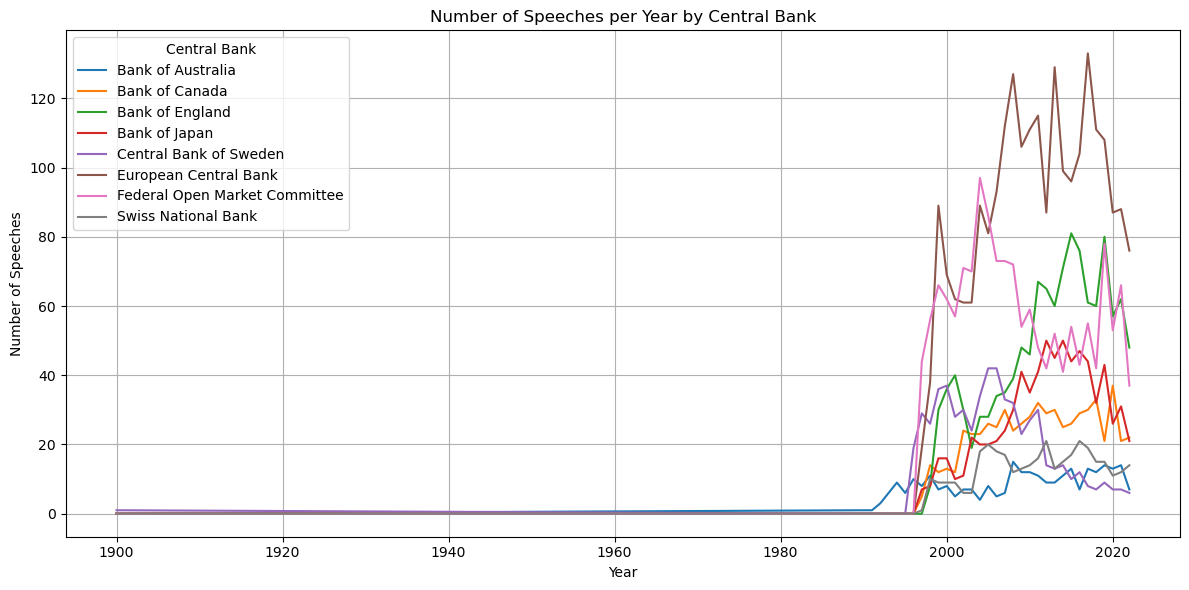

In [139]:
# Copy the base DataFrame
speech_df = df_all_speeches.copy()

# Extract the body code from the 'Reference' column
speech_df['Body'] = speech_df['Reference'].str.extract(r'_([^_]+)$')

# Map body codes to central bank names
body_to_bank = {
    'BOA': 'Bank of Australia',
    'BOC': 'Bank of Canada',
    'ECB': 'European Central Bank',
    'BOJ': 'Bank of Japan',
    'SRB': 'Central Bank of Sweden',
    'SNB': 'Swiss National Bank',
    'BOE': 'Bank of England',
    'FOMC': 'Federal Open Market Committee'
}
speech_df['central_bank'] = speech_df['Body'].map(body_to_bank)


# Extract year from the 'Date' column
speech_df['year'] = pd.to_datetime(speech_df['Date']).dt.year

# Group and count speeches by year and central bank
speech_counts = (
    speech_df.groupby(['year', 'central_bank'])
    .size()
    .unstack(fill_value=0)
)

# Plot the results
plt.figure(figsize=(12, 6))
for bank in speech_counts.columns:
    plt.plot(speech_counts.index, speech_counts[bank], label=bank)

plt.title('Number of Speeches per Year by Central Bank')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.grid(True)
plt.legend(title='Central Bank')
plt.tight_layout()
plt.show()

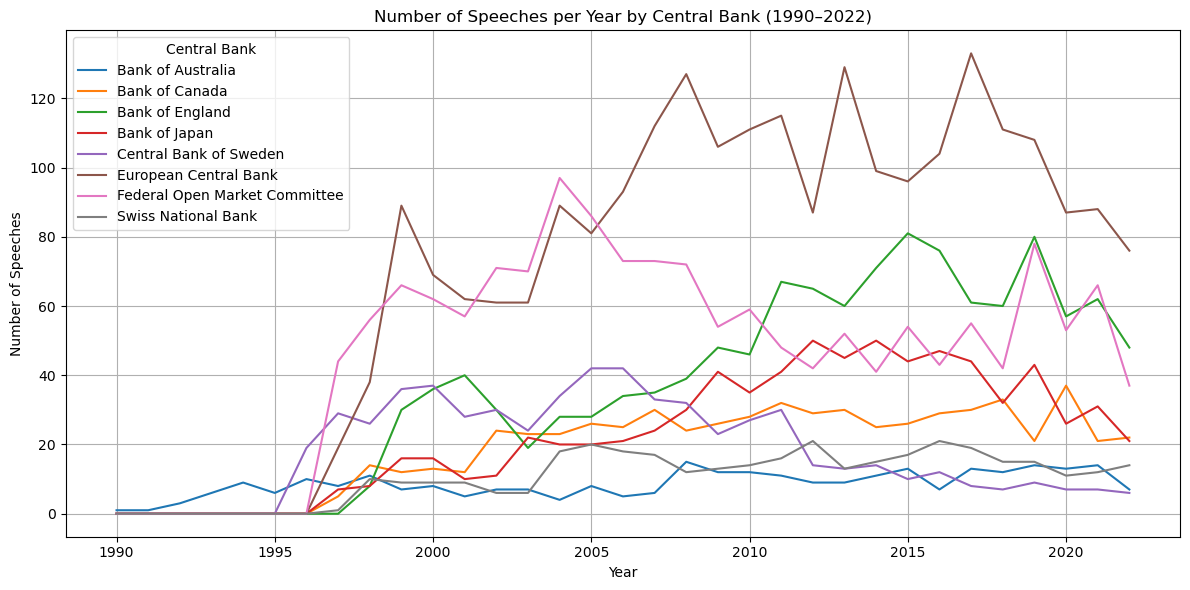

<Figure size 640x480 with 0 Axes>

In [140]:
# Filter to years between 1990 and 2022
filtered_df = speech_df[(speech_df['year'] >= 1990) & (speech_df['year'] <= 2022)]

# Group and count speeches again for the filtered range
filtered_counts = (
    filtered_df.groupby(['year', 'central_bank'])
    .size()
    .unstack(fill_value=0)
)

# Plot for 1990–2022
plt.figure(figsize=(12, 6))
for bank in filtered_counts.columns:
    plt.plot(filtered_counts.index, filtered_counts[bank], label=bank)

plt.title('Number of Speeches per Year by Central Bank (1990–2022)')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.grid(True)
plt.legend(title='Central Bank')
plt.tight_layout()
plt.show()
plt.savefig("number_speeches_year_central_bank.png", dpi=300, bbox_inches='tight')

* Filter the df_all_speeches for only the Country United Kingdom 

In [142]:
# Subset the data to reduce processing time.Only the country United Kingdom

df_uk = df_all_speeches[df_all_speeches['Country']=='United Kingdom'].sort_values('Year').reset_index(drop=True)

df_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Reference  1209 non-null   object        
 1   Country    1209 non-null   object        
 2   Date       1209 non-null   datetime64[ns]
 3   Year       1209 non-null   int32         
 4   Month      1209 non-null   object        
 5   Title      1209 non-null   object        
 6   Author     1209 non-null   object        
 7   IsGov      1209 non-null   object        
 8   Text       1209 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(7)
memory usage: 80.4+ KB


**Read LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 and create dictionary:**

In [145]:
# Create a new data frame for the file sentiment labelled wordlist
#Elif file
#df_sentiment_words = pd.read_excel('C:\\Users\\elif.ozkol\\Desktop\\LSE Project\\LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2.xlsx')
df_sentiment_words = pd.read_excel('C:\\Users\\elif\\Desktop\\LSE BoE project\\LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2.xlsx')
#Gamze file
#df_sentiment_words = pd.read_excel("C:\\Users\\gamze bozkurt omar\\Desktop\\Employer_Project\\LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2.xlsx")
#df_sentiment_words

**NLTK with Custom Lexicon**

In [148]:
# Force all entries in 'Word' column to strings, skipping bad ones
df_sentiment_words = df_sentiment_words[df_sentiment_words['Word'].apply(lambda x: isinstance(x, str))]

df_sentiment_words

,Word,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
0,ABANDON,1,0,0,0,0,0,0
1,ABANDONED,1,0,0,0,0,0,0
2,ABANDONING,1,0,0,0,0,0,0
3,ABANDONMENT,1,0,0,0,0,0,0
4,ABANDONMENTS,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
3874,WRONGDOING,1,0,0,0,0,0,0
3875,WRONGDOINGS,1,0,0,0,0,0,0
3876,WRONGFUL,1,0,0,0,0,0,0
3877,WRONGFULLY,1,0,0,0,0,0,0


**Build the custom lexicon**

In [156]:
custom_lexicon = {}

for _, row in df_sentiment_words.iterrows():
    word = row['Word'].lower()
    
    # Weighted score based on categories
    score = (
        row['Positive'] * 2.0 +
        row['Negative'] * -2.0 +
        row['Uncertainty'] * -0.5 +
        row['Litigious'] * -0.3 +
        row['Strong'] * 1.0 +
        row['Weak'] * -1.0 +
        row['Constraining'] * -0.5
    )
    
    # Only include non-zero scores
    if score != 0:
        custom_lexicon[word] = score

**Define an NLTK-based analyzer using the lexicon**

In [159]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Only needs to run once

def analyze_sentiment(text, lexicon):
    tokens = word_tokenize(str(text).lower())
    score = sum(lexicon.get(word, 0) for word in tokens)
    
    pos_words = [w for w in tokens if lexicon.get(w, 0) > 0]
    neg_words = [w for w in tokens if lexicon.get(w, 0) < 0]

    return {
        "SentimentScore": score,
        "PositiveCount": len(pos_words),
        "NegativeCount": len(neg_words),
        "TotalWords": len(tokens)
    }


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elif\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Apply to the DataFrame df_uk**

In [162]:
# Apply sentiment analysis to each row in the 'Text' column
sentiment_results = df_uk['Text'].apply(lambda text: analyze_sentiment(text, custom_lexicon))

# Convert results (dicts) into separate columns
sentiment_df = sentiment_results.apply(pd.Series)

# Merge back into original DataFrame
df_uk = pd.concat([df_uk, sentiment_df], axis=1)


In [163]:
df_uk

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,SentimentScore,PositiveCount,NegativeCount,TotalWords
0,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,Yes,thank chairman actually pleased opportunity re...,-54.9,51.0,86.0,1142.0
1,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,Yes,great pleasure beautiful city bruges honoured ...,-51.8,92.0,145.0,2072.0
2,r981021a_BOE,United Kingdom,1998-10-21,1998,October,Impact of the recent turbulence in internation...,King,No,industries suffered volatility british economy...,-97.6,36.0,107.0,1225.0
3,r981101a_BOE,United Kingdom,1998-11-01,1998,November,"Economic policy, with and without forecasts",Budd,No,topic evening use forecasts economic policymak...,-153.8,52.0,186.0,2332.0
4,r981101b_BOE,United Kingdom,1998-11-01,1998,November,Inflation targeting in practice: the UK experi...,Vickers,No,six years ago week sterling left exchange rate...,-219.8,54.0,242.0,2533.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,r220523a_BOE,United Kingdom,2022-05-23,2022,May,Opening remarks at OeNB monetary policy panel,Bailey,No,time large economic shocks particularly large ...,-10.5,7.0,12.0,234.0
1205,r220525a_BOE,United Kingdom,2022-05-25,2022,May,What will operational resilience look like goi...,Mackinnon,No,important business services impact tolerances ...,-281.9,69.0,306.0,3759.0
1206,r220526a_BOE,United Kingdom,2022-05-26,2022,May,Four Rs: Creating the conditions for long-term...,Gerken,No,asset eligibility liability eligibility calcul...,-460.4,122.0,653.0,7900.0
1207,r220608a_BOE,United Kingdom,2022-06-08,2022,June,Climate Biennial Exploratory Scenario: Insuran...,Claus,No,thank inviting speak today abis climate summit...,-99.0,23.0,128.0,1165.0


#### TextBlob Sentiment Analysis

In [51]:
%%time
# Demo: Using a self defined function with Textblob to calculate polarity and subjectivity.
def generate_polarity_subjectivity(dfs):
    dft2 = TextBlob(dfs).sentiment
    return pd.Series([dft2[0], dft2[1]])

# Apply the function to the data and add two new columns
df_uk[['polarity','subjectivity']] = df_uk['Text'].apply(generate_polarity_subjectivity)
df_uk.head()

CPU times: total: 8.89 s
Wall time: 9 s


,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,Negative,...,Weak,Constraining,NetSentiment,TotalSentimentWords,PositiveRatio,NegativeRatio,UncertaintyRatio,SentimentLabel,polarity,subjectivity
0,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,Yes,thank chairman actually pleased opportunity re...,87,...,14,13,-32,219,0.251142,0.397260,0.159817,Negative,0.064537,0.427930
1,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,Yes,great pleasure beautiful city bruges honoured ...,56,...,16,12,-27,156,0.185897,0.358974,0.237179,Negative,0.062791,0.356223
2,r981021a_BOE,United Kingdom,1998-10-21,1998,October,Impact of the recent turbulence in internation...,King,No,industries suffered volatility british economy...,42,...,15,13,25,191,0.350785,0.219895,0.183246,Positive,0.067741,0.380480
3,r981101a_BOE,United Kingdom,1998-11-01,1998,November,"Economic policy, with and without forecasts",Budd,No,topic evening use forecasts economic policymak...,59,...,20,8,-7,199,0.261307,0.296482,0.236181,Negative,0.055705,0.465611
4,r981101b_BOE,United Kingdom,1998-11-01,1998,November,Inflation targeting in practice: the UK experi...,Vickers,No,six years ago week sterling left exchange rate...,74,...,27,11,-11,240,0.262500,0.308333,0.191667,Negative,0.048789,0.387690


In [ ]:
df_uk = df_uk.rename(columns={'polarity': 'polarity_textblob', 'subjectivity' :''})

In [52]:
%%time
# Demo: Frequency distribution review of a single speech.

import nltk
nltk.download('punkt_tab')

# Tokenise the text data.
stop_words=set(stopwords.words('english'))
filtered_text = []

# Example speech using iloc to reference (Hint: Can be used in loops if required).
tokenized_word = word_tokenize(df_uk.iloc[0,8])

# Filter the tokenised words.
for each_word in tokenized_word:
    if each_word.lower() not in stop_words and each_word.isalpha():
        filtered_text.append(each_word.lower())

# Display the filtered list.
#print('Tokenised list without stop words: {}'.format(filtered_text))

# Create a frequency distribution object.
freq_dist_of_words = FreqDist(filtered_text)

# Show the five most common elements in the data set.
freq_dist_of_words.most_common(10)

CPU times: total: 15.6 ms
Wall time: 29 ms


[nltk_data] Downloading package punkt_tab to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[('economy', 26),
 ('inflation', 22),
 ('growth', 15),
 ('policy', 13),
 ('demand', 13),
 ('employment', 10),
 ('whole', 9),
 ('sectors', 9),
 ('know', 8),
 ('capacity', 8)]

#### Polarity Histogram

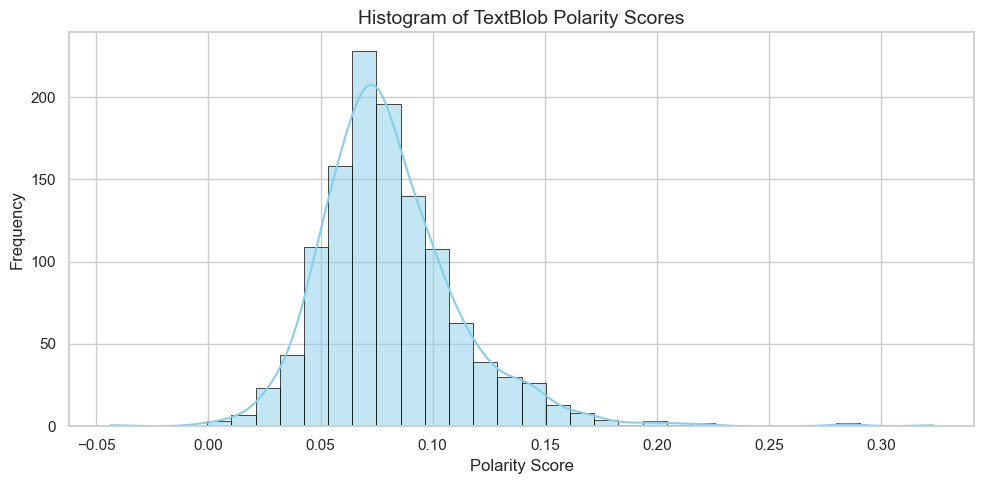

In [331]:
# Calculate number of bins using the square-root rule
num_bins = int(np.sqrt(len(df_uk)))

# Plot using seaborn to include KDE
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_uk,
    x='polarity',
    bins=num_bins,
    kde=True,                      # This adds the smooth line
    color='skyblue',
    edgecolor='black',
    linewidth=0.5
)

plt.title('Histogram of TextBlob Polarity Scores', fontsize=14)
plt.xlabel('Polarity Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("histogram_textblob_polarity_scores.png", dpi=300, bbox_inches='tight')
plt.show()


#### Subjectivity Histogram

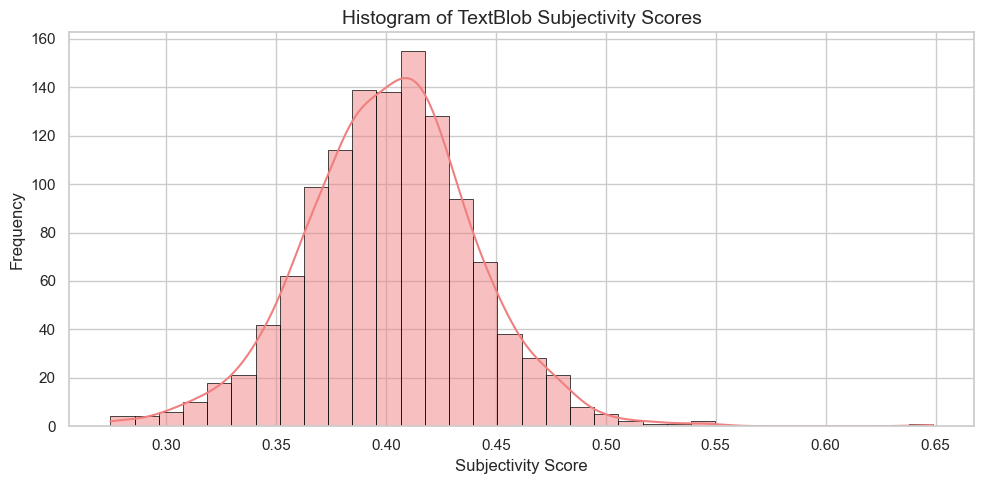

In [333]:
# Calculate appropriate number of bins
num_bins = int(np.sqrt(len(df_uk)))

# Plot histogram with KDE line
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_uk,
    x='subjectivity',
    bins=num_bins,
    kde=True,                   # Adds smoothed curve
    color='lightcoral',
    edgecolor='black',
    linewidth=0.5
)

plt.title('Histogram of TextBlob Subjectivity Scores', fontsize=14)
plt.xlabel('Subjectivity Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("histogram_textblob_subjectivity_scores.png", dpi=300, bbox_inches='tight')
plt.show()


In [57]:
df_uk['polarity'].describe()

count    1209.000000
mean        0.081109
std         0.031970
min        -0.043709
25%         0.061064
50%         0.076737
75%         0.096477
max         0.323077
Name: polarity, dtype: float64

In [58]:
#### Economic Indicators

In [59]:
customer_confidence = pd.read_excel(
    r"C:\Users\gamze bozkurt omar\Desktop\Employer_Project\Consumer Confidence-20250503T115507Z-001\Consumer Confidence\GfK Consumer Confidence.xlsx", 
    skiprows=3
)
customer_confidence

,GEOGN,UNITED KINGDOM
0,1990-01-15,-19
1,1990-02-15,-24
2,1990-03-15,-35
3,1990-04-15,-31
4,1990-05-15,-30
...,...,...
419,2024-12-15,-17
420,2025-01-15,-22
421,2025-02-15,-20
422,2025-03-15,-19


In [60]:
#Cleaning customer data 
#Drop completely empty rows and columns
customer_confidence.dropna(how='all', axis=0, inplace=True)
customer_confidence.dropna(how='all', axis=1, inplace=True)

#Rename columns for clarity
customer_confidence.columns = ['Date', 'confidence_score']

#Convert 'date' to datetime (format like '2001 MAR')
customer_confidence['Date'] = pd.to_datetime(customer_confidence['Date'], format='%Y %b')
customer_confidence
customer_confidence.to_csv("customer_confidence.csv", index=False)

In [61]:
# Filter rows between 1999 and 2022
customer_confidence_filtered = customer_confidence[
    (customer_confidence['Date'] >= '1997-01-01') &
    (customer_confidence['Date'] <= '2022-12-31')
].copy()

# Convert to month-year (first day of each month)
customer_confidence_filtered['Date'] = customer_confidence_filtered['Date'].dt.to_period('M').dt.to_timestamp()

# Preview
customer_confidence_filtered.head()

,Date,confidence_score
84,1997-01-01,2
85,1997-02-01,2
86,1997-03-01,1
87,1997-04-01,-1
88,1997-05-01,6


In [62]:
ftse_100 = pd.read_excel('C:\\Users\\gamze bozkurt omar\\Desktop\\Employer_Project\\FTSE indices\\FTSE indices\\FTSE100.xlsx', skiprows=15)
ftse_100.head(10)

,Date,Price,CVol,Change,% Change,"Total Return (Gross, Unhedged)","Cumulative Return % (Gross, Unhedged)",Open,High,Low
0,1989-12-29,2422.699951,NaN,NaN,NaN,732.750000,NaN,NaN,2422.7,2422.7
1,1990-01-02,2434.100098,NaN,11.400146,0.470555,736.169983,0.466733,NaN,2434.1,2434.1
2,1990-01-03,2463.699951,NaN,29.599854,1.216049,745.119995,1.688160,NaN,2463.7,2463.7
3,1990-01-04,2451.600098,NaN,-12.099854,-0.491125,741.450012,1.187310,NaN,2451.6,2451.6
4,1990-01-05,2444.500000,NaN,-7.100098,-0.289611,739.979980,0.986691,NaN,2444.5,2444.5
5,1990-01-08,2431.300049,NaN,-13.199951,-0.539986,736.000000,0.443535,NaN,2431.3,2431.3
6,1990-01-09,2436.300049,NaN,5.000000,0.205651,737.510010,0.649609,NaN,2436.3,2436.3
7,1990-01-10,2412.600098,NaN,-23.699951,-0.972785,730.349976,-0.327537,NaN,2412.6,2412.6
8,1990-01-11,2417.899902,NaN,5.299805,0.219672,731.950012,-0.109176,NaN,2417.9,2417.9
9,1990-01-12,2380.100098,NaN,-37.799805,-1.563332,720.510010,-1.670418,NaN,2380.1,2380.1


In [63]:
#Drop completely empty rows and columns
ftse_100.dropna(how='all', axis=0, inplace=True)
ftse_100.dropna(how='all', axis=1, inplace=True)

#Rename first few columns for clarity
ftse_100.columns = ['Date', 'Price'] + list(ftse_100.columns[2:])

#Convert 'date' column to datetime
ftse_100['Date'] = pd.to_datetime(ftse_100['Date'], errors='coerce')

# Convert 'price' to numeric
ftse_100['Price'] = pd.to_numeric(ftse_100['Price'], errors='coerce')

#Drop rows with missing dates or prices
ftse_100 = ftse_100.dropna(subset=['Date', 'Price'])

#Keep only date and price
ftse_100_clean = ftse_100[['Date', 'Price']].copy()

# review data
ftse_100_clean.head()
ftse_100_clean.to_csv("ftse_100.csv", index=False)

In [64]:
# Filter rows between 1999 and 2022
ftse_100_clean_filtered = ftse_100_clean[
    (ftse_100_clean['Date'] >= '1997-01-01') &
    (ftse_100_clean['Date'] <= '2022-12-31')
].copy()

# Convert to month-year (first day of each month)
ftse_100_clean_filtered['Date'] = ftse_100_clean_filtered['Date'].dt.to_period('M').dt.to_timestamp()

# Preview
ftse_100_clean_filtered.head()

,Date,Price
1772,1997-01-01,4057.399902
1773,1997-01-01,4089.500000
1774,1997-01-01,4106.500000
1775,1997-01-01,4078.800049
1776,1997-01-01,4087.500000


In [65]:
ftse_250 = pd.read_excel('C:\\Users\\gamze bozkurt omar\\Desktop\\Employer_Project\\FTSE indices\\FTSE indices\\FTSE250.xlsx', skiprows=15)
ftse_250.head(10)

,Date,Price,CVol,Change,% Change,"Total Return (Gross, Unhedged)","Cumulative Return % (Gross, Unhedged)",Open,High,Low
0,1989-12-29,2661.760010,NaN,NaN,NaN,803.789978,NaN,NaN,2661.760010,2661.760010
1,1990-01-02,2678.939941,NaN,17.179932,0.645435,808.969971,0.644446,NaN,2678.939941,2678.939941
2,1990-01-03,2723.300049,NaN,44.360107,1.655883,822.369995,2.311551,NaN,2723.300049,2723.300049
3,1990-01-04,2737.810059,NaN,14.510010,0.532810,826.750000,2.856470,NaN,2737.810059,2737.810059
4,1990-01-05,2725.350098,NaN,-12.459961,-0.455107,822.989990,2.388685,NaN,2725.350098,2725.350098
5,1990-01-08,2722.050049,NaN,-3.300049,-0.121087,821.989990,2.264275,NaN,2722.050049,2722.050049
6,1990-01-09,2724.629883,NaN,2.579834,0.094775,822.770020,2.361319,NaN,2724.629883,2724.629883
7,1990-01-10,2707.239990,NaN,-17.389893,-0.638248,817.520020,1.708163,NaN,2707.239990,2707.239990
8,1990-01-11,2706.360107,NaN,-0.879883,-0.032501,817.250000,1.674570,NaN,2706.360107,2706.360107
9,1990-01-12,2669.780029,NaN,-36.580078,-1.351634,806.210022,0.301079,NaN,2669.780029,2669.780029


In [66]:
#Drop completely empty rows and columns
ftse_250.dropna(how='all', axis=0, inplace=True)
ftse_250.dropna(how='all', axis=1, inplace=True)

#Rename first few columns for clarity
ftse_250.columns = ['Date', 'Price'] + list(ftse_100.columns[2:])

#Convert 'date' column to datetime
ftse_250['Date'] = pd.to_datetime(ftse_100['Date'], errors='coerce')

# Convert 'price' to numeric
ftse_250['Price'] = pd.to_numeric(ftse_100['Price'], errors='coerce')

#Drop rows with missing dates or prices
ftse_250 = ftse_100.dropna(subset=['Date', 'Price'])

#Keep only date and price
ftse_250_clean = ftse_100[['Date', 'Price']].copy()

# review data
ftse_250_clean.head()
ftse_250_clean.to_csv("ftse_250.csv", index=False)

In [67]:
# Filter rows between 1999 and 2022
ftse_250_clean_filtered = ftse_250_clean[
    (ftse_250_clean['Date'] >= '1997-01-01') &
    (ftse_250_clean['Date'] <= '2022-12-31')
].copy()

# Convert to month-year (first day of each month)
ftse_250_clean_filtered['Date'] = ftse_250_clean_filtered['Date'].dt.to_period('M').dt.to_timestamp()

# Preview
ftse_250_clean_filtered.head()

,Date,Price
1772,1997-01-01,4057.399902
1773,1997-01-01,4089.500000
1774,1997-01-01,4106.500000
1775,1997-01-01,4078.800049
1776,1997-01-01,4087.500000


In [68]:
ftse_350 = pd.read_excel('C:\\Users\\gamze bozkurt omar\\Desktop\\Employer_Project\\FTSE indices\\FTSE indices\\FTSE350.xlsx', skiprows=15)
ftse_350.head(10)

,Date,Price,CVol,Change,% Change,"Total Return (Gross, Unhedged)","Cumulative Return % (Gross, Unhedged)",Open,High,Low
0,1990-01-01,1205.910034,NaN,NaN,NaN,748.419983,NaN,NaN,1205.910034,1205.910034
1,1990-01-02,1212.040039,NaN,6.130005,0.508330,752.219971,0.507735,NaN,1212.040039,1212.040039
2,1990-01-03,1227.989990,NaN,15.949951,1.315959,762.119995,1.830525,NaN,1227.989990,1227.989990
3,1990-01-04,1224.829956,NaN,-3.160034,-0.257334,760.159973,1.568637,NaN,1224.829956,1224.829956
4,1990-01-05,1220.810059,NaN,-4.019897,-0.328200,758.200012,1.306757,NaN,1220.810059,1220.810059
5,1990-01-08,1215.430054,NaN,-5.380005,-0.440691,754.849976,0.859142,NaN,1215.430054,1215.430054
6,1990-01-09,1217.599976,NaN,2.169922,0.178531,756.200012,1.039527,NaN,1217.599976,1217.599976
7,1990-01-10,1206.709961,NaN,-10.890015,-0.894384,749.440002,0.136290,NaN,1206.709961,1206.709961
8,1990-01-11,1208.660034,NaN,1.950073,0.161602,750.650024,0.297967,NaN,1208.660034,1208.660034
9,1990-01-12,1190.359985,NaN,-18.300049,-1.514077,739.280029,-1.221233,NaN,1190.359985,1190.359985


In [69]:
#Drop completely empty rows and columns
ftse_350.dropna(how='all', axis=0, inplace=True)
ftse_350.dropna(how='all', axis=1, inplace=True)

#Rename first few columns for clarity
ftse_350.columns = ['Date', 'Price'] + list(ftse_100.columns[2:])

#Convert 'date' column to datetime
ftse_350['Date'] = pd.to_datetime(ftse_100['Date'], errors='coerce')

# Convert 'price' to numeric
ftse_350['Price'] = pd.to_numeric(ftse_100['Price'], errors='coerce')

#Drop rows with missing dates or prices
ftse_350 = ftse_100.dropna(subset=['Date', 'Price'])

#Keep only date and price
ftse_350_clean = ftse_100[['Date', 'Price']].copy()

# review data
ftse_350_clean.head()
ftse_350_clean.to_csv("ftse_350.csv", index=False)

In [70]:
# Filter rows between 1999 and 2022
ftse_350_clean_filtered = ftse_350_clean[
    (ftse_350_clean['Date'] >= '1997-01-01') &
    (ftse_350_clean['Date'] <= '2022-12-31')
].copy()

# Convert to month-year (first day of each month)
ftse_350_clean_filtered['Date'] = ftse_350_clean_filtered['Date'].dt.to_period('M').dt.to_timestamp()

# Preview
ftse_350_clean_filtered.head()

,Date,Price
1772,1997-01-01,4057.399902
1773,1997-01-01,4089.500000
1774,1997-01-01,4106.500000
1775,1997-01-01,4078.800049
1776,1997-01-01,4087.500000


In [71]:
file_path = r"C:\Users\gamze bozkurt omar\Desktop\Employer_Project\Unemployment rate\Unemployment rate\Unemployment.csv"
unemployment = pd.read_csv(file_path, skiprows=277)
unemployment.head(100)

,2024 Q4,4.4
0,1971 FEB,3.8
1,1971 MAR,3.9
2,1971 APR,4.0
3,1971 MAY,4.1
4,1971 JUN,4.1
...,...,...
95,1979 JAN,5.3
96,1979 FEB,5.4
97,1979 MAR,5.3
98,1979 APR,5.3


In [72]:
# Rename the columns properly
unemployment.columns = ['Date', 'unemployment_rate']

# Convert 'date' to datetime
unemployment['Date'] = pd.to_datetime(unemployment['Date'], format='%Y %b')

# Convert unemployment_rate to numeric
unemployment['unemployment_rate'] = pd.to_numeric(unemployment['unemployment_rate'], errors='coerce')

#Drop the original 'date' column 
unemployment_clean = unemployment[['Date', 'unemployment_rate']].copy()

#preview
unemployment_clean.head()
unemployment_clean.to_csv("unemployment_clean.csv", index=False)

In [73]:
# Filter rows between 1999 and 2022
unemployment_clean_filtered = unemployment_clean[
    (unemployment_clean['Date'] >= '1997-01-01') &
    (unemployment_clean['Date'] <= '2022-12-31')
].copy()

# Convert to month-year (first day of each month)
unemployment_clean_filtered['Date'] = unemployment_clean_filtered['Date'].dt.to_period('M').dt.to_timestamp()

# Preview
unemployment_clean_filtered.head()

,Date,unemployment_rate
311,1997-01-01,7.5
312,1997-02-01,7.3
313,1997-03-01,7.2
314,1997-04-01,7.2
315,1997-05-01,7.2


In [74]:
file_path = r"C:\Users\gamze bozkurt omar\Desktop\Employer_Project\Wage growth-20250503T115455Z-001\Wage growth\Wage growth.csv"
wage = pd.read_csv(file_path, skiprows=7)
wage.head(100)

,Important notes,Unnamed: 1
0,2001 MAR,6.1
1,2001 APR,6.2
2,2001 MAY,5.1
3,2001 JUN,5.5
4,2001 JUL,5.2
...,...,...
95,2009 FEB,-1.8
96,2009 MAR,-2.9
97,2009 APR,-1.8
98,2009 MAY,0.5


In [75]:
# Drop fully empty columns
wage.dropna(axis=1, how='all', inplace=True)

# View column names to identify correct ones
print(wage.columns)

# Let's say the first two columns are what you want:
wage = wage.iloc[:, :2]
wage.columns = ['Date', 'growth_rate']

# Convert 'date' and 'growth_rate'
wage['Date'] = pd.to_datetime(wage['Date'], format='%Y %b', errors='coerce')
wage['growth_rate'] = pd.to_numeric(wage['growth_rate'], errors='coerce')

# Final cleaned version
wage_clean = wage[['Date', 'growth_rate']].dropna()
wage_clean.reset_index(drop=True, inplace=True)


# Preview
wage_clean.head()
wage_clean.to_csv("wage_clean.csv", index=False)


Index(['Important notes', 'Unnamed: 1'], dtype='object')


In [76]:
# Filter rows between 1999 and 2022
wage_clean_filtered = wage_clean[
    (wage_clean['Date'] >= '1999-01-01') &
    (wage_clean['Date'] <= '2022-12-31')
].copy()

# Convert to month-year (first day of each month)
wage_clean_filtered['Date'] = wage_clean_filtered['Date'].dt.to_period('M').dt.to_timestamp()

# Preview
wage_clean_filtered.tail()

,Date,growth_rate
257,2022-08-01,6.1
258,2022-09-01,6.0
259,2022-10-01,6.2
260,2022-11-01,6.6
261,2022-12-01,6.2


In [143]:
file_path = r"C:\Users\gamze bozkurt omar\Desktop\Employer_Project\UK gilts\UK gilts\PriceHistory_02.xlsx"
price_02 = pd.read_excel(file_path, skiprows=15)
price_02.head(10)

,Date,Price,CVol,Change,% Change,"Total Return (Gross, Unhedged)","Cumulative Return % (Gross, Unhedged)",Open,High,Low
0,1989-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1990-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1990-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1990-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1990-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1990-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
# Keep only 'Date' and 'Price' columns
price_02 = price_02[['Date', 'Price']]

# Convert 'Date' to datetime
price_02['Date'] = pd.to_datetime(price_02['Date'], errors='coerce')

#Convert 'Price' to numeric
price_02['Price'] = pd.to_numeric(price_02['Price'], errors='coerce')

#Drop rows with missing Date or Price
price_02 = price_02.dropna(subset=['Date', 'Price'])

#Review data
price_02.head()
price_02.to_excel("price_02.xlsx", index=False)


In [149]:
# Filter rows between 1997 and 2022
price_02_filtered = price_02[
    (price_02['Date'] >= '1997-01-01') &
    (price_02['Date'] <= '2022-12-31')
].copy()

# Convert to month-year (first day of each month)
price_02_filtered['Date'] = price_02_filtered['Date'].dt.to_period('M').dt.to_timestamp()

# Preview
price_02_filtered.head()

,Date,Price
2148,1998-06-01,101.433370
2149,1998-07-01,101.438240
2150,1998-07-01,101.416245
2151,1998-07-01,101.390590
2152,1998-07-01,101.356990


In [151]:
file_path = r"C:\Users\gamze bozkurt omar\Desktop\Employer_Project\UK gilts\UK gilts\PriceHistory_05.xlsx"
price_05 = pd.read_excel(file_path, skiprows=15)
price_05.head(10)

,Date,Price,CVol,Change,% Change,"Total Return (Gross, Unhedged)","Cumulative Return % (Gross, Unhedged)",Open,High,Low
0,1989-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1990-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1990-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1990-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1990-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1990-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
# Keep only 'Date' and 'Price' columns
price_05 = price_05[['Date', 'Price']]

# Convert 'Date' to datetime
price_05['Date'] = pd.to_datetime(price_05['Date'], errors='coerce')

#Convert 'Price' to numeric
price_05['Price'] = pd.to_numeric(price_05['Price'], errors='coerce')

#Drop rows with missing Date or Price
price_05 = price_05.dropna(subset=['Date', 'Price'])

#Review data
price_05.head()
price_05.to_excel("price_05.xlsx", index=False)

In [155]:
# Filter rows between 1999 and 2022
price_05_filtered = price_05[
    (price_05['Date'] >= '1997-01-01') &
    (price_05['Date'] <= '2022-12-31')
].copy()

# Convert to month-year (first day of each month)
price_05_filtered['Date'] = price_05_filtered['Date'].dt.to_period('M').dt.to_timestamp()

# Preview
price_05_filtered.head()

,Date,Price
2148,1998-06-01,120.226746
2149,1998-07-01,120.347590
2150,1998-07-01,120.558136
2151,1998-07-01,120.872734
2152,1998-07-01,120.592600


In [157]:
file_path = r"C:\Users\gamze bozkurt omar\Desktop\Employer_Project\UK gilts\UK gilts\PriceHistory_10.xlsx"
price_10 = pd.read_excel(file_path, skiprows=15)
price_10.head(10)

,Date,Price,CVol,Change,% Change,"Total Return (Gross, Unhedged)","Cumulative Return % (Gross, Unhedged)",Open,High,Low
0,1989-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1990-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1990-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1990-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1990-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1990-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
# Keep only 'Date' and 'Price' columns
price_10 = price_10[['Date', 'Price']]

# Convert 'Date' to datetime
price_10['Date'] = pd.to_datetime(price_10['Date'], errors='coerce')

#Convert 'Price' to numeric
price_10['Price'] = pd.to_numeric(price_10['Price'], errors='coerce')

#Drop rows with missing Date or Price
price_10 = price_10.dropna(subset=['Date', 'Price'])

#Review data
price_10.head()
price_10.to_excel("price_10.xlsx", index=False)

In [161]:
# Filter rows between 1999 and 2022
price_10_filtered = price_10[
    (price_10['Date'] >= '1997-01-01') &
    (price_10['Date'] <= '2022-12-31')
].copy()

# Convert to month-year (first day of each month)
price_10_filtered['Date'] = price_10_filtered['Date'].dt.to_period('M').dt.to_timestamp()

# Preview
price_10_filtered.head()

,Date,Price
1772,1997-01-01,103.35029
1773,1997-01-01,102.62843
1774,1997-01-01,102.19505
1775,1997-01-01,102.14857
1776,1997-01-01,102.18181


In [179]:
# Define your cleaned DataFrames first
dataframes = [
    ftse_100_clean_filtered,
    ftse_250_clean_filtered,
    ftse_350_clean_filtered,
    customer_confidence_filtered,
    unemployment_clean_filtered,
    wage_clean_filtered,
    price_02_filtered,
    price_05_filtered,
    price_10_filtered
]

# Drop duplicate Date entries in each DataFrame
for i in range(len(dataframes)):
    dataframes[i] = dataframes[i].drop_duplicates(subset='Date')



In [183]:
mermerged_df = dataframes[0]

for i, df in enumerate(dataframes[1:], start=1):
    merged_df = pd.merge(
        merged_df,
        df,
        on='Date',
        how='left',
        suffixes=('', f'_{i}')  # Adds _1, _2, etc. to overlapping column names
    )


In [185]:
for i, df in enumerate(dataframes):
    dupes = df.duplicated(subset='Date').sum()
    print(f"DF {i} duplicate Dates: {dupes}")

DF 0 duplicate Dates: 0
DF 1 duplicate Dates: 0
DF 2 duplicate Dates: 0
DF 3 duplicate Dates: 0
DF 4 duplicate Dates: 0
DF 5 duplicate Dates: 0
DF 6 duplicate Dates: 0
DF 7 duplicate Dates: 0
DF 8 duplicate Dates: 0


In [187]:
merged_df.head()

,Date,Price_x,Price_y,Price,confidence_score,unemployment_rate,growth_rate,Price_1,Price_2,confidence_score_3,unemployment_rate_4,growth_rate_5,Price_6,Price_7,Price_8
0,1997-01-01,4057.399902,4057.399902,4057.399902,2,7.5,NaN,4057.399902,4057.399902,2,7.5,NaN,NaN,NaN,103.35029
1,1997-02-01,4257.799805,4257.799805,4257.799805,2,7.3,NaN,4257.799805,4257.799805,2,7.3,NaN,NaN,NaN,106.25833
2,1997-03-01,4307.100098,4307.100098,4307.100098,1,7.2,NaN,4307.100098,4307.100098,1,7.2,NaN,NaN,NaN,107.45778
3,1997-04-01,4248.100098,4248.100098,4248.100098,-1,7.2,NaN,4248.100098,4248.100098,-1,7.2,NaN,NaN,NaN,103.48729
4,1997-05-01,4445.000000,4445.000000,4445.000000,6,7.2,NaN,4445.000000,4445.000000,6,7.2,NaN,NaN,NaN,106.25985


In [202]:
merged_df.rename(columns={
    'Price_x': 'FTSE 100',
    'Price_y': 'FTSE 250',
    'Price': 'FTSE 350',
    'confidence_score': 'Consumer Confidence',
    'growth_rate ': 'Wage_Growth',
    'unemployment_rate ': 'Unemployment Rate',
    'Price_1': 'Gilts 0-2Y',
    'Price_2': 'Gilts 5Y+',
    'Price_8': 'Gilts 10Y'
}, inplace=True)


In [204]:
merged_df

,Date,FTSE 100,FTSE 250,FTSE 350,Consumer Confidence,unemployment_rate,growth_rate,Gilts 0-2Y,Gilts 5Y+,Gilts 10Y
0,1997-01-01,4057.399902,4057.399902,4057.399902,2,7.5,NaN,4057.399902,4057.399902,103.350290
1,1997-02-01,4257.799805,4257.799805,4257.799805,2,7.3,NaN,4257.799805,4257.799805,106.258330
2,1997-03-01,4307.100098,4307.100098,4307.100098,1,7.2,NaN,4307.100098,4307.100098,107.457780
3,1997-04-01,4248.100098,4248.100098,4248.100098,-1,7.2,NaN,4248.100098,4248.100098,103.487290
4,1997-05-01,4445.000000,4445.000000,4445.000000,6,7.2,NaN,4445.000000,4445.000000,106.259850
...,...,...,...,...,...,...,...,...,...,...
307,2022-08-01,7413.419936,7413.419936,7413.419936,-44,3.7,6.1,7413.419936,7413.419936,107.064163
308,2022-09-01,7148.502334,7148.502334,7148.502334,-49,3.8,6.0,7148.502334,7148.502334,90.155426
309,2022-10-01,6908.755698,6908.755698,6908.755698,-47,3.9,6.2,6908.755698,6908.755698,81.062134
310,2022-11-01,7186.162673,7186.162673,7186.162673,-44,3.9,6.6,7186.162673,7186.162673,84.304337


In [195]:
merged_df.to_excel("merged_data_1998_2022.xlsx", index=False)

#### Bank rate decisions

In [173]:
import pandas as pd

# Correct way to read the Excel file
file_path = r"C:\Users\gamze bozkurt omar\Desktop\Employer_Project\mpcvoting.xlsx"
mpc = pd.read_excel(file_path, header=None, skiprows=10)

# Preview
print(mpc.head(20))


     0          1       2   3   4   5   6   7   8   9   ...  45  46  47  48  \
0   NaN        NaT  0.0625 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
1   NaN 1997-06-06  0.0650 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
2   NaN 1997-07-10  0.0675 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
3   NaN 1997-08-07  0.0700 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
4   NaN 1997-09-11  0.0700 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
5   NaN 1997-10-09  0.0700 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
6   NaN 1997-11-06  0.0725 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
7   NaN 1997-12-04  0.0725 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
8   NaN 1998-01-08  0.0725 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
9   NaN 1998-02-05  0.0725 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
10  NaN 1998-03-05  0.0725 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
11  NaN 1998-04-09  0.0725 NaN NaN NaN NaN NaN NaN N

In [175]:

# Keep only the relevant columns: column 1 = Date, column 2 = Rate
mpc = mpc[[1, 2]]
mpc.columns = ['Date', 'Rate']

# Drop any rows where Date or Rate is missing
mpc = mpc.dropna(subset=['Date', 'Rate'])

# Convert Date to datetime and sort
mpc['Date'] = pd.to_datetime(mpc['Date'])
mpc = mpc.sort_values('Date')

# Calculate Rate Change, Magnitude, and Direction
mpc['Rate_Change'] = mpc['Rate'].diff()
mpc['Change_Magnitude'] = mpc['Rate_Change'].abs()
mpc['Direction'] = mpc['Rate_Change'].apply(lambda x: 'Up' if x > 0 else 'Down' if x < 0 else 'Same')

# Final cleaned version
mpc_cleaned = mpc[['Date', 'Rate', 'Rate_Change', 'Change_Magnitude', 'Direction']]

# Preview
print(mpc_cleaned.head())


        Date    Rate  Rate_Change  Change_Magnitude Direction
1 1997-06-06  0.0650          NaN               NaN      Same
2 1997-07-10  0.0675       0.0025            0.0025        Up
3 1997-08-07  0.0700       0.0025            0.0025        Up
4 1997-09-11  0.0700       0.0000            0.0000      Same
5 1997-10-09  0.0700       0.0000            0.0000      Same


In [177]:
print(mpc.columns)


Index(['Date', 'Rate', 'Rate_Change', 'Change_Magnitude', 'Direction'], dtype='object')


In [208]:
mpc.to_excel("bank_rate_changes.xlsx", index=False)

In [105]:
# Import all the necessary packages.
!pip install transformers
!pip install torch torchvision torchaudio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import transformers
import nltk
nltk.download('punkt')

from transformers import BertTokenizer, BertForSequenceClassification

print(transformers.__version__)
print(torch.__version__)

[nltk_data] Downloading package punkt to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


4.51.3
2.7.0+cpu


In [299]:
print(df_uk.columns.tolist())


['Reference', 'Country', 'Date', 'Year', 'Month', 'Title', 'Author', 'IsGov', 'Text', 'Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong', 'Weak', 'Constraining', 'NetSentiment', 'TotalSentimentWords', 'PositiveRatio', 'NegativeRatio', 'UncertaintyRatio', 'SentimentLabel', 'polarity', 'subjectivity', 'FinBERT_Negative', 'FinBERT_Neutral', 'FinBERT_Positive', 'Polarity_Score', 'Sentiment', 'Sentiment_vader', 'neutral', 'positive', 'negative', 'finbert_polarity', 'neutral_finbert', 'positive_fibert', 'negative_finbert', 'finbert_polarity', 'polarity_score_finbert']


In [301]:
df_uk = df_uk[['Reference', 'Country', 'Date', 'Year', 'Month', 'Title', 'Author', 'IsGov', 'Text', 'Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong', 'Weak', 'Constraining', 'NetSentiment', 'TotalSentimentWords', 'PositiveRatio', 'NegativeRatio', 'UncertaintyRatio', 'SentimentLabel', 'polarity', 'subjectivity','Sentiment_vader']]


In [305]:
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
model = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')
model.eval()  # Set model to evaluation mode


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30873, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [307]:
print("FinBERT labels:", model.config.id2label)
# Should print: {0: 'Neutral', 1: 'Positive', 2: 'Negative'}


FinBERT labels: {0: 'Neutral', 1: 'Positive', 2: 'Negative'}


In [309]:
def chunk_text(text, max_length=510):
    sentences = sent_tokenize(text)
    current_chunk = []
    chunks = []

    for sentence in sentences:
        current_chunk.append(sentence)
        tokenized = tokenizer(" ".join(current_chunk), return_tensors="pt", truncation=False)
        if tokenized['input_ids'].shape[1] > max_length:
            current_chunk.pop()
            chunks.append(" ".join(current_chunk))
            current_chunk = [sentence]
    if current_chunk:
        chunks.append(" ".join(current_chunk))

    return chunks


In [311]:
def analyse_sentiment(text):
    chunks = chunk_text(text)
    sentiments = []

    for chunk in chunks:
        inputs = tokenizer(chunk, return_tensors="pt", padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1).detach().numpy()[0]
        sentiments.append(probs)

    avg_sentiments = np.mean(sentiments, axis=0)
    sentiment_series = pd.Series({
        'neutral_finbert': avg_sentiments[0],
        'positive_finbert': avg_sentiments[1],
        'negative_finbert': avg_sentiments[2],
        'polarity_score_finbert': avg_sentiments[1] - avg_sentiments[2]
    })
    return sentiment_series


In [313]:
tqdm.pandas()  # Enable progress bar
finbert_results = df_uk['Text'].progress_apply(lambda x: analyse_sentiment(str(x)))
df_uk = pd.concat([df_uk.reset_index(drop=True), finbert_results], axis=1)


100%|██████████| 1209/1209 [09:52<00:00,  2.04it/s]


In [327]:
yearly_sentiment = df_uk.groupby('Year')['polarity_score_finbert'].mean().reset_index()


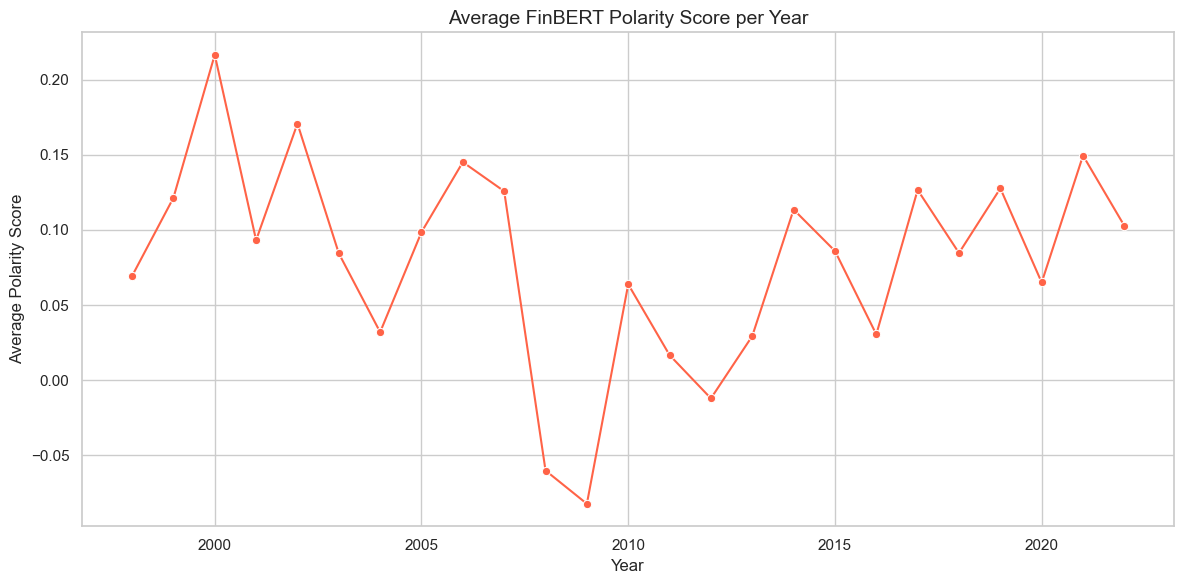

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sentiment, x='Year', y='polarity_score_finbert', marker='o', color='tomato')

plt.title('Average FinBERT Polarity Score per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Polarity Score', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("finbert_yearly_sentiment_trend.png", dpi=300)
plt.show()


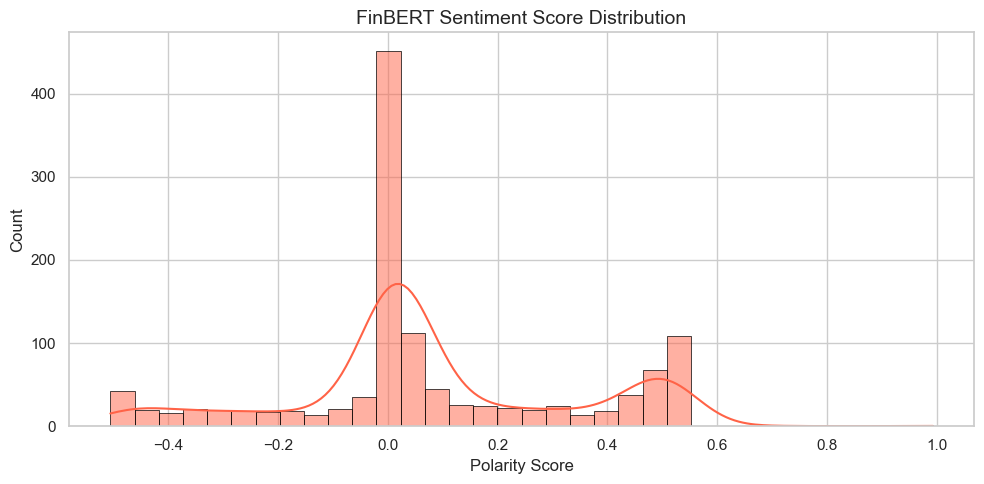

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_uk,
    x='polarity_score_finbert',
    bins=34,
    kde=True,               # ← This adds the smooth line!
    color='tomato',
    edgecolor='black',
    linewidth=0.5
)

plt.title('FinBERT Sentiment Score Distribution', fontsize=14)
plt.xlabel('Polarity Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig("finbert_polarity_distribution.png", dpi=300)
plt.show()



In [317]:
df_uk

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,Negative,...,NegativeRatio,UncertaintyRatio,SentimentLabel,polarity,subjectivity,Sentiment_vader,neutral_finbert,positive_finbert,negative_finbert,polarity_score_finbert
0,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,Yes,thank chairman actually pleased opportunity re...,87,...,0.397260,0.159817,Negative,0.064537,0.427930,-0.9927,0.737529,0.099846,0.162625,-0.062779
1,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,Yes,great pleasure beautiful city bruges honoured ...,56,...,0.358974,0.237179,Negative,0.062791,0.356223,0.9995,0.532217,0.466339,0.001444,0.464896
2,r981021a_BOE,United Kingdom,1998-10-21,1998,October,Impact of the recent turbulence in internation...,King,No,industries suffered volatility british economy...,42,...,0.219895,0.183246,Positive,0.067741,0.380480,-0.9906,0.808452,0.022303,0.169245,-0.146942
3,r981101a_BOE,United Kingdom,1998-11-01,1998,November,"Economic policy, with and without forecasts",Budd,No,topic evening use forecasts economic policymak...,59,...,0.296482,0.236181,Negative,0.055705,0.465611,-0.9952,0.983587,0.015397,0.001015,0.014382
4,r981101b_BOE,United Kingdom,1998-11-01,1998,November,Inflation targeting in practice: the UK experi...,Vickers,No,six years ago week sterling left exchange rate...,74,...,0.308333,0.191667,Negative,0.048789,0.387690,-0.9993,0.983661,0.015350,0.000989,0.014361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,r220523a_BOE,United Kingdom,2022-05-23,2022,May,Opening remarks at OeNB monetary policy panel,Bailey,No,time large economic shocks particularly large ...,48,...,0.309677,0.090323,Negative,0.057218,0.393033,-0.9760,0.985162,0.001903,0.012935,-0.011032
1205,r220525a_BOE,United Kingdom,2022-05-25,2022,May,What will operational resilience look like goi...,Mackinnon,No,important business services impact tolerances ...,11,...,0.183333,0.250000,Positive,0.147425,0.545723,0.9987,0.504662,0.481926,0.013412,0.468514
1206,r220526a_BOE,United Kingdom,2022-05-26,2022,May,Four Rs: Creating the conditions for long-term...,Gerken,No,asset eligibility liability eligibility calcul...,19,...,0.168142,0.097345,Positive,0.111964,0.437292,0.9998,0.983631,0.015385,0.000985,0.014400
1207,r220608a_BOE,United Kingdom,2022-06-08,2022,June,Climate Biennial Exploratory Scenario: Insuran...,Claus,No,thank inviting speak today abis climate summit...,50,...,0.289017,0.167630,Neutral,0.086440,0.400447,-0.9643,0.925728,0.072965,0.001307,0.071657


#### VADER SENTIMENT

In [211]:
df_uk

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,Negative,...,PositiveRatio,NegativeRatio,UncertaintyRatio,SentimentLabel,polarity,subjectivity,FinBERT_Negative,FinBERT_Neutral,FinBERT_Positive,Polarity_Score
0,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,Yes,thank chairman actually pleased opportunity re...,87,...,0.251142,0.397260,0.159817,Negative,0.064537,0.427930,0.737529,0.099846,0.162625,-0.574905
1,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,Yes,great pleasure beautiful city bruges honoured ...,56,...,0.185897,0.358974,0.237179,Negative,0.062791,0.356223,0.532217,0.466339,0.001444,-0.530773
2,r981021a_BOE,United Kingdom,1998-10-21,1998,October,Impact of the recent turbulence in internation...,King,No,industries suffered volatility british economy...,42,...,0.350785,0.219895,0.183246,Positive,0.067741,0.380480,0.808452,0.022303,0.169245,-0.639208
3,r981101a_BOE,United Kingdom,1998-11-01,1998,November,"Economic policy, with and without forecasts",Budd,No,topic evening use forecasts economic policymak...,59,...,0.261307,0.296482,0.236181,Negative,0.055705,0.465611,0.983587,0.015397,0.001015,-0.982572
4,r981101b_BOE,United Kingdom,1998-11-01,1998,November,Inflation targeting in practice: the UK experi...,Vickers,No,six years ago week sterling left exchange rate...,74,...,0.262500,0.308333,0.191667,Negative,0.048789,0.387690,0.983661,0.015350,0.000989,-0.982672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,r220523a_BOE,United Kingdom,2022-05-23,2022,May,Opening remarks at OeNB monetary policy panel,Bailey,No,time large economic shocks particularly large ...,48,...,0.212903,0.309677,0.090323,Negative,0.057218,0.393033,0.985162,0.001903,0.012935,-0.972227
1205,r220525a_BOE,United Kingdom,2022-05-25,2022,May,What will operational resilience look like goi...,Mackinnon,No,important business services impact tolerances ...,11,...,0.200000,0.183333,0.250000,Positive,0.147425,0.545723,0.504662,0.481926,0.013412,-0.491250
1206,r220526a_BOE,United Kingdom,2022-05-26,2022,May,Four Rs: Creating the conditions for long-term...,Gerken,No,asset eligibility liability eligibility calcul...,19,...,0.283186,0.168142,0.097345,Positive,0.111964,0.437292,0.983631,0.015385,0.000985,-0.982646
1207,r220608a_BOE,United Kingdom,2022-06-08,2022,June,Climate Biennial Exploratory Scenario: Insuran...,Claus,No,thank inviting speak today abis climate summit...,50,...,0.289017,0.289017,0.167630,Neutral,0.086440,0.400447,0.925728,0.072965,0.001307,-0.924421


In [213]:
# Force all entries in 'Word' column to strings, skipping bad ones
df_sentiment_words = df_sentiment_words[df_sentiment_words['Word'].apply(lambda x: isinstance(x, str))]

df_sentiment_words

,Word,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
0,ABANDON,1,0,0,0,0,0,0
1,ABANDONED,1,0,0,0,0,0,0
2,ABANDONING,1,0,0,0,0,0,0
3,ABANDONMENT,1,0,0,0,0,0,0
4,ABANDONMENTS,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
3874,WRONGDOING,1,0,0,0,0,0,0
3875,WRONGDOINGS,1,0,0,0,0,0,0
3876,WRONGFUL,1,0,0,0,0,0,0
3877,WRONGFULLY,1,0,0,0,0,0,0


In [215]:
custom_lexicon = {}

for _, row in df_sentiment_words.iterrows():
    word = row['Word'].lower()
    
    # Weighted score based on categories
    score = (
        row['Positive'] * 2.0 +
        row['Negative'] * -2.0 +
        row['Uncertainty'] * -0.5 +
        row['Litigious'] * -0.3 +
        row['Strong'] * 1.0 +
        row['Weak'] * -1.0 +
        row['Constraining'] * -0.5
    )
    
    # Only include non-zero scores
    if score != 0:
        custom_lexicon[word] = score

In [217]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
analyzer.lexicon.update(custom_lexicon)

In [235]:
# Apply VADER to each speech
df_uk['Sentiment_vader'] = df_uk['Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df_uk


,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,Negative,...,UncertaintyRatio,SentimentLabel,polarity,subjectivity,FinBERT_Negative,FinBERT_Neutral,FinBERT_Positive,Polarity_Score,Sentiment,Sentiment_vader
0,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,Yes,thank chairman actually pleased opportunity re...,87,...,0.159817,Negative,0.064537,0.427930,0.737529,0.099846,0.162625,-0.574905,-0.9927,-0.9927
1,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,Yes,great pleasure beautiful city bruges honoured ...,56,...,0.237179,Negative,0.062791,0.356223,0.532217,0.466339,0.001444,-0.530773,0.9995,0.9995
2,r981021a_BOE,United Kingdom,1998-10-21,1998,October,Impact of the recent turbulence in internation...,King,No,industries suffered volatility british economy...,42,...,0.183246,Positive,0.067741,0.380480,0.808452,0.022303,0.169245,-0.639208,-0.9906,-0.9906
3,r981101a_BOE,United Kingdom,1998-11-01,1998,November,"Economic policy, with and without forecasts",Budd,No,topic evening use forecasts economic policymak...,59,...,0.236181,Negative,0.055705,0.465611,0.983587,0.015397,0.001015,-0.982572,-0.9952,-0.9952
4,r981101b_BOE,United Kingdom,1998-11-01,1998,November,Inflation targeting in practice: the UK experi...,Vickers,No,six years ago week sterling left exchange rate...,74,...,0.191667,Negative,0.048789,0.387690,0.983661,0.015350,0.000989,-0.982672,-0.9993,-0.9993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,r220523a_BOE,United Kingdom,2022-05-23,2022,May,Opening remarks at OeNB monetary policy panel,Bailey,No,time large economic shocks particularly large ...,48,...,0.090323,Negative,0.057218,0.393033,0.985162,0.001903,0.012935,-0.972227,-0.9760,-0.9760
1205,r220525a_BOE,United Kingdom,2022-05-25,2022,May,What will operational resilience look like goi...,Mackinnon,No,important business services impact tolerances ...,11,...,0.250000,Positive,0.147425,0.545723,0.504662,0.481926,0.013412,-0.491250,0.9987,0.9987
1206,r220526a_BOE,United Kingdom,2022-05-26,2022,May,Four Rs: Creating the conditions for long-term...,Gerken,No,asset eligibility liability eligibility calcul...,19,...,0.097345,Positive,0.111964,0.437292,0.983631,0.015385,0.000985,-0.982646,0.9998,0.9998
1207,r220608a_BOE,United Kingdom,2022-06-08,2022,June,Climate Biennial Exploratory Scenario: Insuran...,Claus,No,thank inviting speak today abis climate summit...,50,...,0.167630,Neutral,0.086440,0.400447,0.925728,0.072965,0.001307,-0.924421,-0.9643,-0.9643


In [237]:
# Group by year and compute average sentiment
yearly_sentiment = df_uk.groupby('Year')['Sentiment_vader'].mean().reset_index()

# Sort by year (optional)
yearly_sentiment = yearly_sentiment.sort_values('Year')
yearly_sentiment

,Year,Sentiment_vader
0,1998,-0.721475
1,1999,0.376240
2,2000,0.729411
3,2001,0.035492
4,2002,0.263683
5,2003,0.039368
6,2004,0.246596
7,2005,-0.105364
8,2006,0.137468
9,2007,0.204186


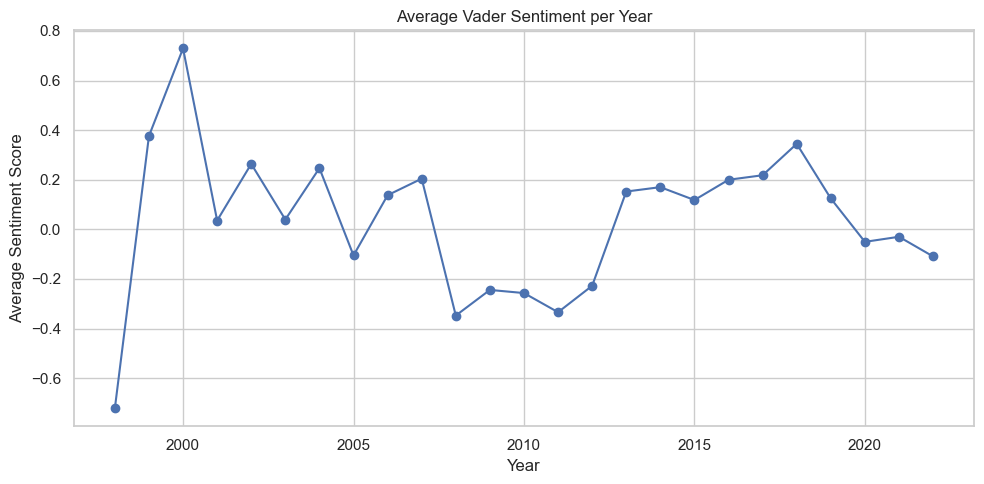

<Figure size 640x480 with 0 Axes>

In [323]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(yearly_sentiment['Year'], yearly_sentiment['Sentiment_vader'], marker='o')
plt.title('Average Vader Sentiment per Year')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("average_sentiment_vader_peryear", dpi=300)

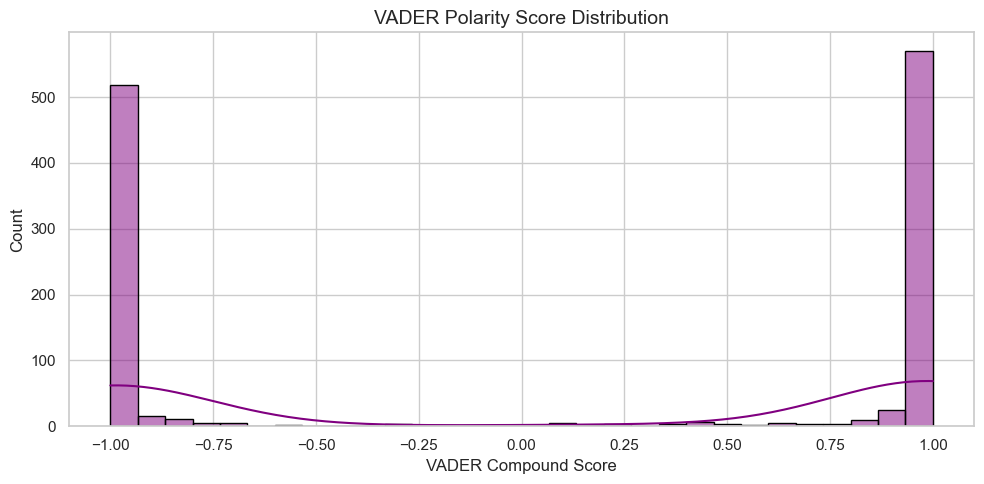

<Figure size 640x480 with 0 Axes>

In [325]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_uk,
    x='Sentiment_vader',
    bins=30,
    kde=True,
    color='purple',
    edgecolor='black'
)

plt.title('VADER Polarity Score Distribution', fontsize=14)
plt.xlabel('VADER Compound Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()
plt.savefig("vader_polarity_distribution.png", dpi=300)

In [243]:
# Group by both Year and Author, calculate mean sentiment
author_year_sentiment = df_uk.groupby(['Year', 'Author'])['Sentiment_vader'].mean().reset_index()
author_year_sentiment 

,Year,Author,Sentiment_vader
0,1998,Budd,-0.995200
1,1998,Buiter,-0.800000
2,1998,George,-0.329167
3,1998,Governor,-0.999200
4,1998,King,-0.990600
...,...,...,...
436,2022,Sheppard,0.999600
437,2022,Stheeman,0.997500
438,2022,Tenreyro,-0.999800
439,2022,Wilkins,0.999600
